In [1]:
import urllib.request
import gzip
import shutil
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
from google.colab import files

uploaded = files.upload()

Saving web-Google.txt.gz to web-Google.txt.gz


In [3]:
# Decompress the file and load the data
with gzip.open("web-Google.txt.gz", "rt") as f:
    data = f.readlines()

In [4]:
# Create a graph
G = nx.Graph()

In [6]:
# Import necessary modules
import urllib.request
import gzip
import shutil
import networkx as nx
import matplotlib.pyplot as plt

# Upload the file using files.upload()
uploaded = files.upload()

# Check if the file is uploaded correctly
if uploaded:
    # Extract the filename from the uploaded files
    filename = list(uploaded.keys())[0]

    # Decompress the file and load the data
    with gzip.open(filename, "rt") as f:
        data = f.readlines()

    # Create a graph
    G = nx.Graph()

    # Read the edgelist from the decompressed file
    G = nx.read_edgelist(filename, create_using=nx.DiGraph())

    # The graph is now created and can be used for further analysis
else:
    # Handle the case where the file upload failed
    print("Error: File upload failed.")

Saving web-Google.txt.gz to web-Google.txt (1).gz


In [7]:
# Analyse de la distribution des degrés
degree_distribution = nx.degree_histogram(G)
print("Distribution des degrés :", degree_distribution)

Distribution des degrés : [0, 130912, 109975, 74248, 57733, 47306, 39938, 34399, 32711, 30368, 27464, 25223, 22423, 19745, 18464, 16674, 15277, 13728, 12020, 11105, 10362, 9355, 8481, 7724, 7175, 6562, 5737, 5603, 5102, 4690, 4229, 4099, 3464, 3283, 3056, 3078, 2953, 2806, 2594, 2214, 2061, 1643, 1437, 1300, 1089, 1047, 1057, 979, 940, 865, 816, 787, 793, 703, 683, 616, 557, 539, 596, 457, 425, 431, 421, 408, 373, 362, 306, 353, 293, 288, 291, 282, 254, 294, 240, 252, 237, 195, 196, 198, 210, 206, 185, 168, 164, 184, 155, 161, 153, 131, 127, 160, 117, 135, 138, 128, 125, 101, 128, 113, 133, 105, 88, 94, 90, 85, 105, 83, 93, 83, 100, 63, 85, 72, 60, 61, 76, 68, 73, 60, 60, 72, 55, 72, 45, 47, 57, 44, 50, 50, 55, 37, 48, 39, 37, 32, 49, 46, 45, 44, 24, 36, 24, 34, 21, 31, 40, 39, 22, 30, 39, 37, 30, 37, 24, 32, 31, 32, 22, 33, 19, 22, 26, 23, 22, 22, 17, 18, 15, 11, 17, 17, 11, 26, 22, 26, 13, 18, 9, 15, 11, 11, 16, 15, 16, 14, 14, 14, 10, 13, 17, 10, 10, 19, 18, 10, 11, 10, 14, 9, 8, 14

In [8]:
# Analyse des composants connectés
connected_components = nx.number_weakly_connected_components(G)
print("Nombre de composants connectés :", connected_components)

Nombre de composants connectés : 2746


In [12]:
!pip show networkx


Name: networkx
Version: 3.3
Summary: Python package for creating and manipulating graphs and networks
Home-page: 
Author: 
Author-email: Aric Hagberg <hagberg@lanl.gov>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: hyperopt, python-louvain, scikit-image, torch


In [13]:
import networkx as nx

Text(0, 0.5, 'Nombre de nœuds')

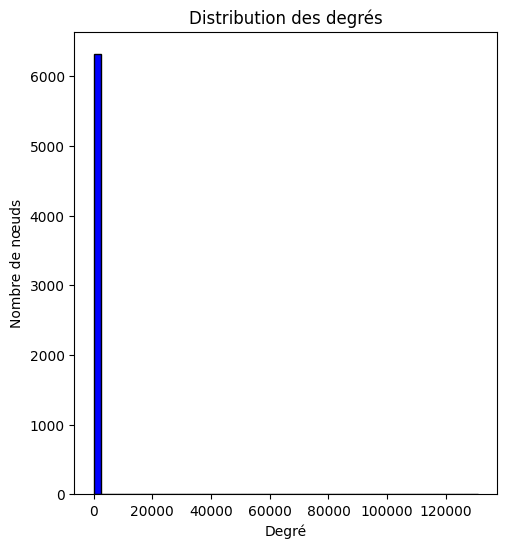

In [20]:
# Tracer l'histogramme pour la distribution des degrés
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(degree_distribution, bins=50, color='b', edgecolor='black')
plt.title("Distribution des degrés")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")

In [23]:
# Analyse des chemins
# Moyenne des longueurs des chemins les plus courts
avg_shortest_path_length = nx.average_shortest_path_length(G)
print("Moyenne des longueurs des chemins les plus courts :", avg_shortest_path_length)

Moyenne des longueurs des chemins les plus courts : 1.0


In [24]:
# Coefficient de clustering
clustering_coefficient = nx.average_clustering(G)
print("Coefficient de clustering moyen :", clustering_coefficient)

# Densité du graphe
graph_density = nx.density(G)
print("Densité du graphe :", graph_density)

Coefficient de clustering moyen : 0.0
Densité du graphe : 1.0


In [25]:
# Analyse de centralité
# Centralité d'intermédiarité
betweenness_centrality = nx.betweenness_centrality(G)
print("Centralité d'intermédiarité :", betweenness_centrality)

# Centralité de proximité
closeness_centrality = nx.closeness_centrality(G)
print("Centralité de proximité :", closeness_centrality)

# Centralité de vecteur propre
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Centralité de vecteur propre :", eigenvector_centrality)

Centralité d'intermédiarité : {'916425': 0.0, '837379': 0.0}
Centralité de proximité : {'916425': 1.0, '837379': 1.0}
Centralité de vecteur propre : {'916425': 0.7071067811865476, '837379': 0.7071067811865476}


In [32]:
!pip install community
import community
from community.community_louvain import best_partition
# Utilisez l'algorithme Louvain pour détecter les communautés
louvain_partition = best_partition(G)
# Afficher le nombre de communautés détectées
num_communities_louvain = len(set(louvain_partition.values()))
print("Nombre de communautés détectées par Louvain :", num_communities_louvain)



Nombre de communautés détectées par Louvain : 1


In [33]:
# Utilisez l'algorithme K-clique pour détecter les communautés
communities_k_clique = list(nx.algorithms.community.k_clique_communities(G, k=3))  # k est le nombre de nœuds minimum dans une clique

# Afficher le nombre de communautés détectées
num_communities_k_clique = len(communities_k_clique)
print("Nombre de communautés détectées par K-clique :", num_communities_k_clique)

Nombre de communautés détectées par K-clique : 0


In [34]:
# Utilisez l'algorithme de propagation des labels pour détecter les communautés
communities_label_propagation = nx.algorithms.community.label_propagation.label_propagation_communities(G)

# Convertir les communautés en listes pour l'affichage
communities_label_propagation = [list(community) for community in communities_label_propagation]

# Afficher le nombre de communautés détectées
num_communities_label_propagation = len(communities_label_propagation)
print("Nombre de communautés détectées par propagation des labels :", num_communities_label_propagation)

Nombre de communautés détectées par propagation des labels : 1


In [38]:
# K-clique
k_clique_communities = list(nx.algorithms.community.k_clique_communities(G, k=3))
print("Nombre de communautés selon K-clique:", len(k_clique_communities))
print("Communautés selon K-clique:")
for i, community in enumerate(k_clique_communities):
    print(f"Communauté {i+1}: {community}")

Nombre de communautés selon K-clique: 0
Communautés selon K-clique:


In [39]:
# Propagation des labels
label_propagation_communities = list(nx.algorithms.community.label_propagation.label_propagation_communities(G))

# Affichage des résultats
print("\nNombre de communautés selon la propagation des labels:", len(label_propagation_communities))
print("Communautés selon la propagation des labels:")
for i, community in enumerate(label_propagation_communities):
    print(f"Communauté {i+1}: {community}")


Nombre de communautés selon la propagation des labels: 1
Communautés selon la propagation des labels:
Communauté 1: {'837379', '916425'}


In [40]:
import networkx as nx
from networkx.algorithms.community import k_clique_communities, label_propagation_communities, greedy_modularity_communities
louvain = list(nx.algorithms.community.greedy_modularity_communities(G))
print("\nNombre de communautés selon Louvain:", len(louvain))
print("Communautés selon Louvain:", louvain)


Nombre de communautés selon Louvain: 1
Communautés selon Louvain: [frozenset({'837379', '916425'})]


In [4]:
# Import des bibliothèques nécessaires
import networkx as nx
import gzip
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [5]:
# 1. Chargement des données
with gzip.open('web-Google.txt.gz', 'rb') as f:
    data = f.readlines()


In [6]:
node_pairs = []
labels = []

# Charger les données depuis le fichier compressé
with gzip.open('web-Google.txt.gz', 'rb') as f:
    # Lire les données ligne par ligne
    for line in f:
        # Convertir la ligne en string
        line = line.decode('utf-8').strip()
        # Ignorer les commentaires et les lignes vides
        if line.startswith('#') or len(line) == 0:
            continue
        # Séparer les nœuds source et destination
        source, target = line.split('\t')
        # Ajouter la paire de nœuds à la liste des paires
        node_pairs.append((source, target))
        # Ajouter le label (1 pour indiquer la présence d'un lien)
        labels.append(1)

# Afficher un exemple des paires de nœuds et des labels
print("Exemple de paires de nœuds et de labels :")
for pair, label in zip(node_pairs[:5], labels[:5]):
    print(pair, label)

Exemple de paires de nœuds et de labels :
('0', '11342') 1
('0', '824020') 1
('0', '867923') 1
('0', '891835') 1
('11342', '0') 1


In [7]:
import gzip
import networkx as nx

# Charger le graphe à partir du fichier compressé
with gzip.open('web-Google.txt.gz', 'rt') as f:
    data = f.readlines()

# Créer un nouveau graphe
G = nx.DiGraph()

# Ajouter les arêtes à partir des données
for line in data:
    if not line.startswith('#'):
        edge = line.strip().split()
        G.add_edge(edge[0], edge[1])

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convertir les paires de nœuds en caractéristiques (features)
# Pour l'exemple, nous pourrions utiliser simplement le degré des nœuds source et destination
X = np.array([(G.degree(node1), G.degree(node2)) for node1, node2 in node_pairs])

# Définir les labels
y = np.array(labels)

# Diviser les données en ensemble d'apprentissage et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# 4. Construction du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

In [10]:
# 5. Entraînement du modèle
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# 6. Prédiction des liens sur l'ensemble de test
y_pred = knn_model.predict(X_test)

In [12]:
# 7. Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle KNN :", accuracy)

Précision du modèle KNN : 1.0


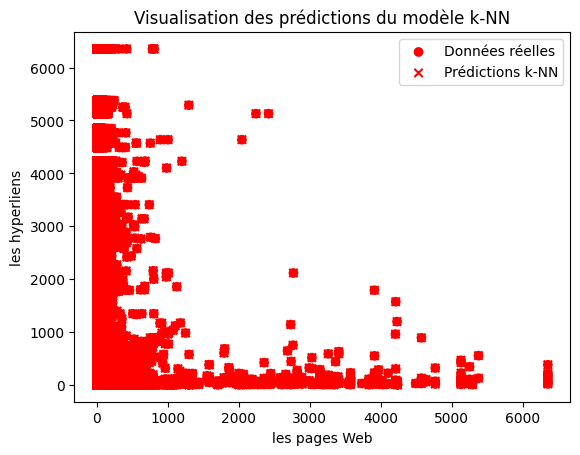

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les couleurs pour les étiquettes réelles
colors = np.array(['blue', 'red'])

# Tracer les données de test avec les étiquettes réelles
plt.scatter(X_test[:, 0], X_test[:, 1], color=colors[y_test], label='Données réelles')

# Tracer les prédictions du modèle k-NN
plt.scatter(X_test[:, 0], X_test[:, 1], color=colors[y_pred], marker='x', label='Prédictions k-NN')

# Ajouter des légendes et un titre
plt.xlabel('les pages Web')
plt.ylabel('les hyperliens')
plt.title('Visualisation des prédictions du modèle k-NN')
plt.legend()

# Afficher le graphique
plt.show()